<a href="https://www.kaggle.com/code/iftekhi/bdapplication-assessment-01?scriptVersionId=158583008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Import All necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   

**Loading The Dataset**

In [2]:
path = '/kaggle/input/chariot-oil-gas/CHAR.L.csv'

data = pd.read_csv(path, parse_dates = ['Date'])
data.head()

,Date,Close
0,2019-01-01,2.7163
1,2019-01-02,2.7014
2,2019-01-03,2.3226
3,2019-01-04,4.4359
4,2019-01-05,4.7349


In [3]:
data.isnull().sum()

Date     0
Close    0
dtype: int64

In [4]:
data

,Date,Close
0,2019-01-01,2.716300
1,2019-01-02,2.701400
2,2019-01-03,2.322600
3,2019-01-04,4.435900
4,2019-01-05,4.734900
5,2019-01-06,4.296300
6,2019-01-07,4.241500
7,2019-01-08,3.792900
8,2019-01-09,3.488900
9,2019-01-10,4.236500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60 non-null     datetime64[ns]
 1   Close   60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [6]:
data.describe()

,Date,Close
count,60,60.000000
mean,2021-01-06 02:24:00,9.262783
min,2019-01-01 00:00:00,1.470300
25%,2020-01-03 18:00:00,3.760500
50%,2021-01-06 12:00:00,7.751350
75%,2022-01-09 06:00:00,15.162500
max,2023-01-12 00:00:00,22.600000
std,NaN,6.170219


> As we can see the day is same for all dates So we can drop day and keep year and mo

In [7]:
data['date'] = data['Date'].dt.strftime('%Y-%d-%m')
data.head()

,Date,Close,date
0,2019-01-01,2.7163,2019-01-01
1,2019-01-02,2.7014,2019-02-01
2,2019-01-03,2.3226,2019-03-01
3,2019-01-04,4.4359,2019-04-01
4,2019-01-05,4.7349,2019-05-01


In [8]:
# Convert from string to datetime
data['date'] = pd.to_datetime(data['date'],infer_datetime_format=True)

/tmp/ipykernel_19/1045295377.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date'] = pd.to_datetime(data['date'],infer_datetime_format=True)


In [9]:
data = data.set_index('date')
data = data.drop('Date', axis=1)
data.head()

,Close
date,
2019-01-01,2.7163
2019-02-01,2.7014
2019-03-01,2.3226
2019-04-01,4.4359
2019-05-01,4.7349


**EDA**

In [10]:
data.describe()

,Close
count,60.000000
mean,9.262783
std,6.170219
min,1.470300
25%,3.760500
50%,7.751350
75%,15.162500
max,22.600000


In [11]:
data['Close'].median()

7.75135

In [12]:
data['Close'].mode()

0    19.4
Name: Close, dtype: float64

/tmp/ipykernel_19/2840822524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Close'], bins=10, hist=True, kde=True, label = 'Close')


<Axes: xlabel='Close', ylabel='Density'>

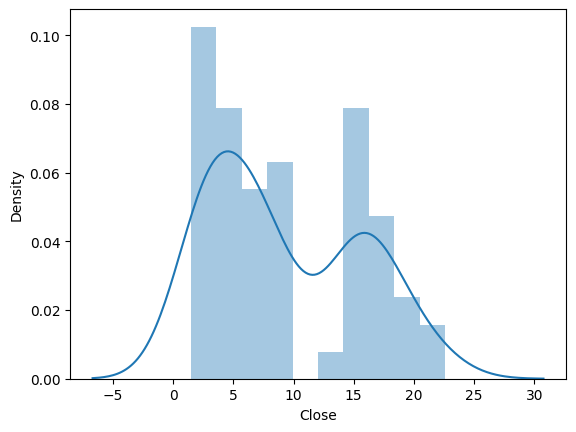

In [13]:
sns.distplot(data['Close'], bins=10, hist=True, kde=True, label = 'Close')

**Skewness**

In [14]:
data['Close'].skew()

0.4508575222650349

The data are fairly symmetrical. 

**Kurtosis**

In [15]:
data['Close'].kurt()

-1.199302446026277

Platykurtic curve bcz 

<Axes: ylabel='Density'>

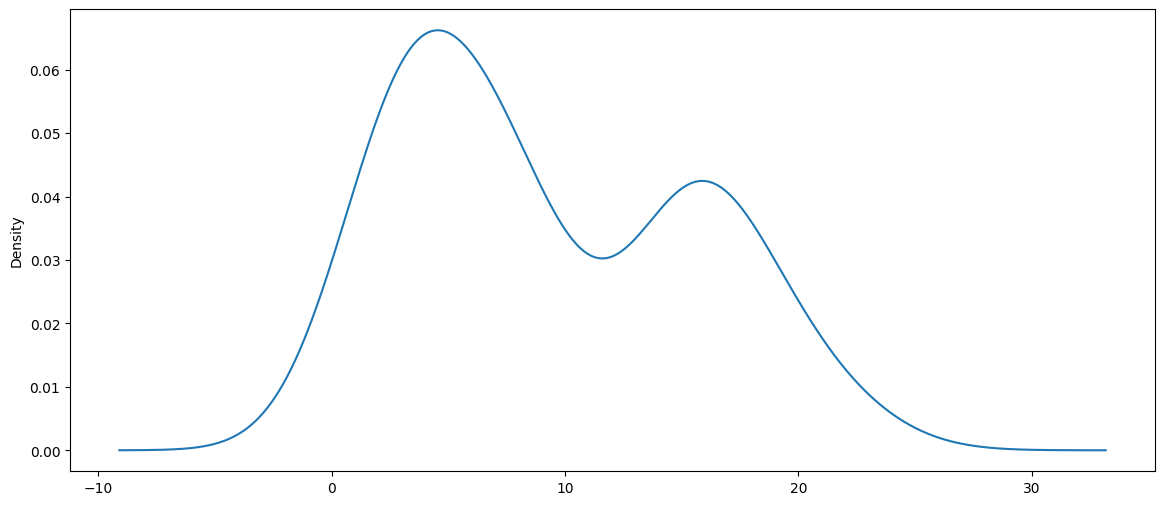

In [16]:
data['Close'].plot(kind='kde', figsize=(14,6))

<Axes: >

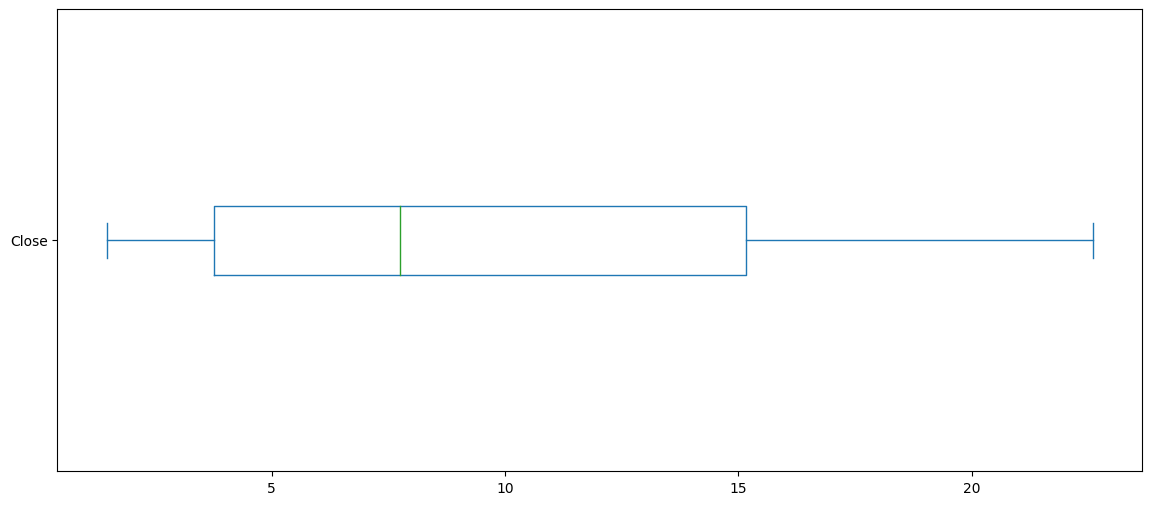

In [17]:
data['Close'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: ylabel='Frequency'>

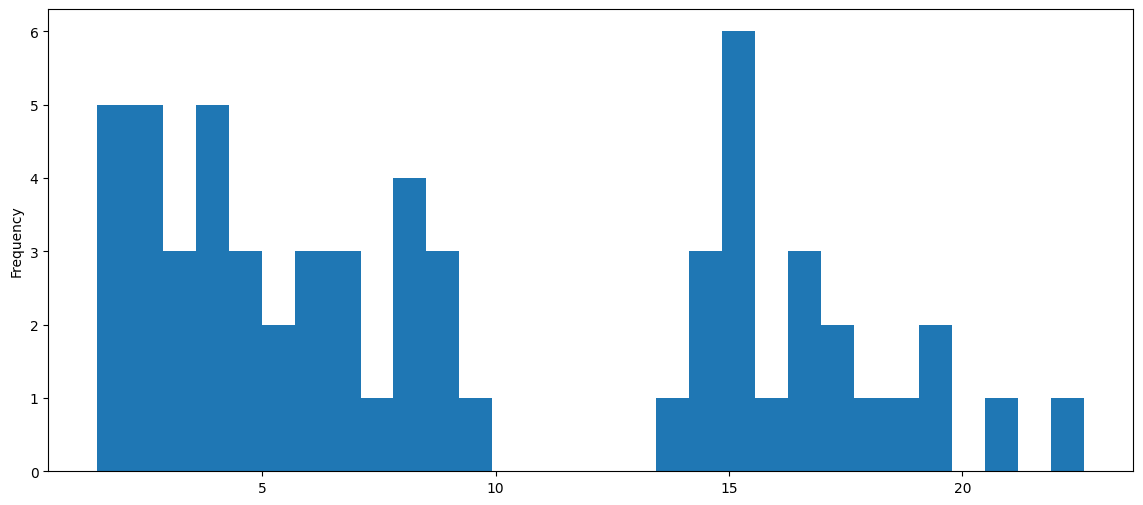

In [18]:
data['Close'].plot(kind='hist', bins=30, figsize = (14,6))

**Time Series Visualization**

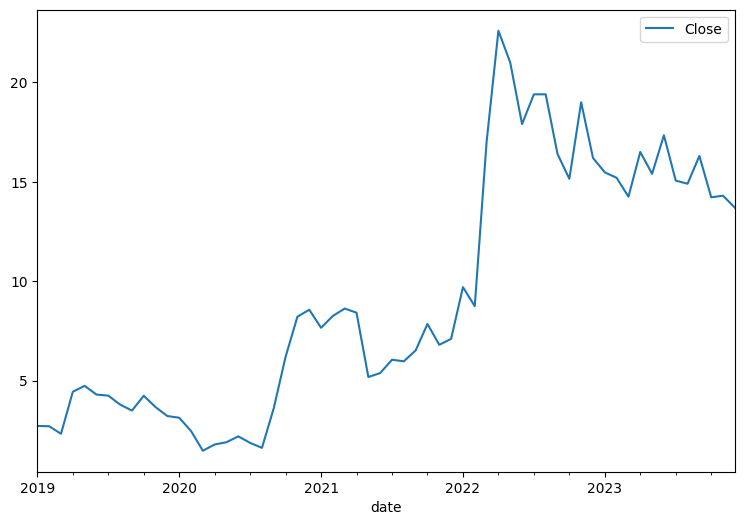

In [19]:
data.plot(figsize=(9,6))
plt.show()

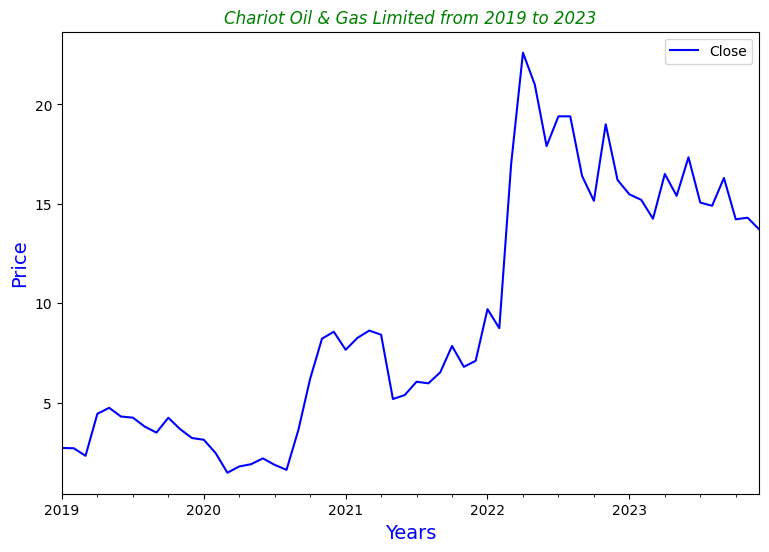

In [20]:
ax = data.plot(color='blue', figsize=(9,6))
ax.set_xlabel('Years', color = 'blue', fontsize = 14)
ax.set_ylabel('Price', color = 'blue', fontsize = 14)
ax.set_title('Chariot Oil & Gas Limited from 2019 to 2023', color='green', fontstyle = 'italic')
plt.show()

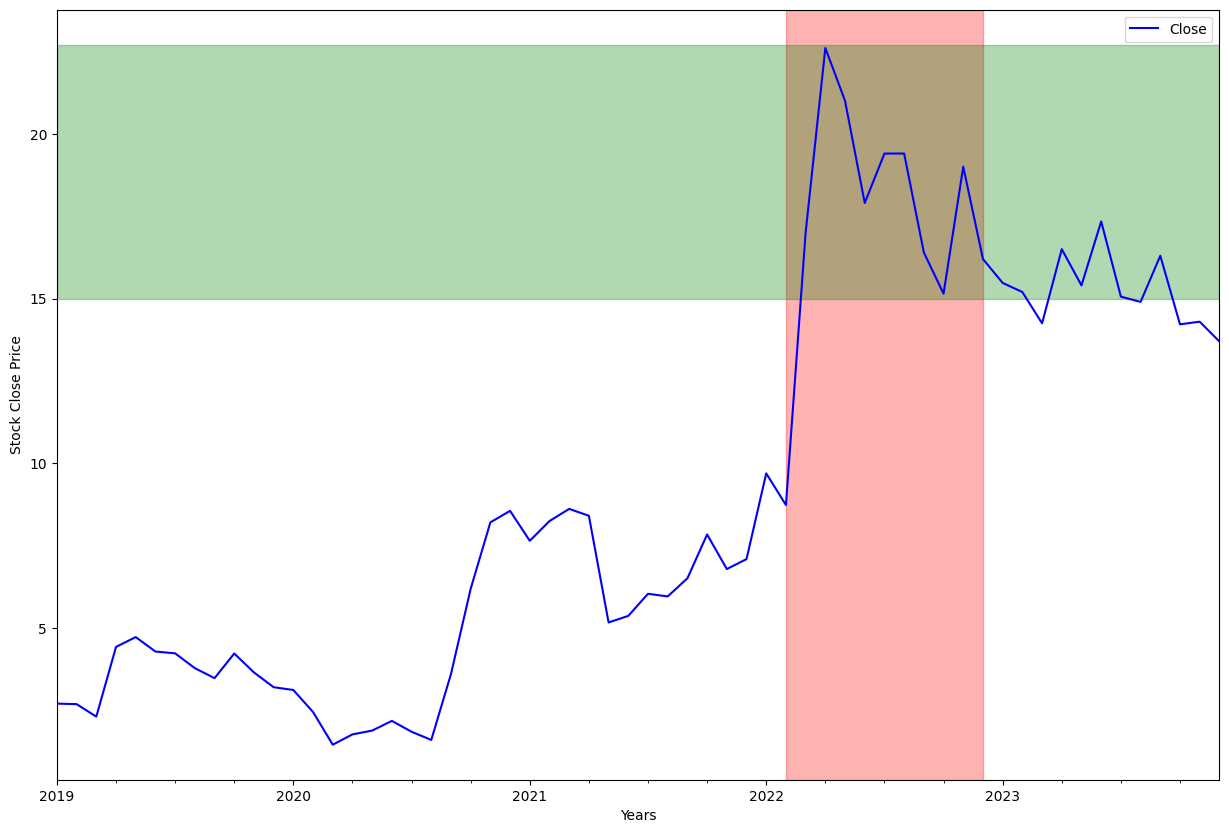

In [21]:
# Highlighting regions of interest
ax = data.plot(color='blue', figsize=(15,10))
ax.set_xlabel('Years')
ax.set_ylabel('Stock Close Price')
ax.axvspan('2022-02-01', '2022-12-01', color='red', alpha=0.3)
ax.axhspan(15, 22.7, color='green', alpha=0.3)

**Autocorrelation and Partial Autocorrelation**

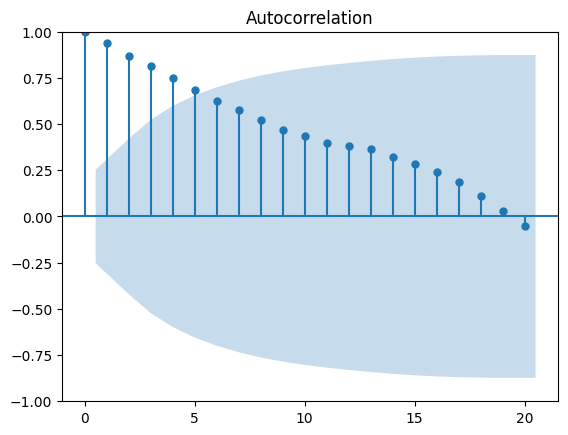

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(data['Close'], lags=20)
plt.show()

Since autocorrelation is a correlation measure, the autocorrelation coefficient can only take values between -1 and 1. An autocorrelation of 0 indicates no correlation, while 1 and -1 indicate strong positive and negetive correlations.

Hints: They are highly correlated and statistically significant.

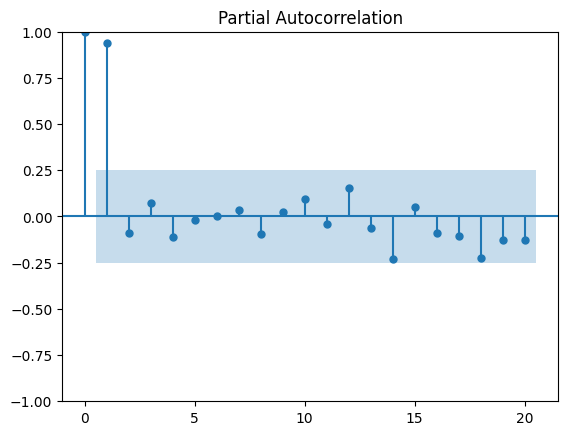

In [23]:
# Plotting partial autocorrelations
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_pacf(data['Close'], lags=20)
plt.show()

If partial autocorrelation values are close to 0, you can conclude that values are not correlated with one another. Inversely, partial autocorrelations that have values close to 1 or -1 indicate that there exist strong positive or negative correlations between the lagged observations of the time series.

If partial autocorrelation values are beyond the margins of uncertainty, which are marked by the blue-shaded regions, then you can assume that the observed partial autocorrelation values are statistically significant.

**Time Series Decomposition**

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


In [25]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(data['Close'], model='multiplicative')

# Additive Decomposition
additive_decomposition = seasonal_decompose(data['Close'], model='additive')

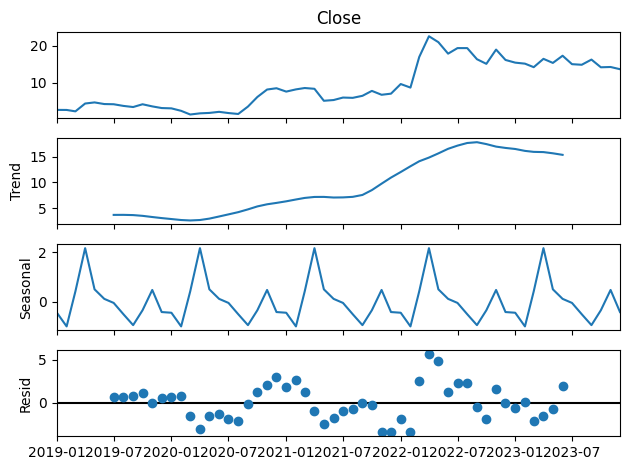

In [26]:
additive_decomposition.plot()
plt.show()


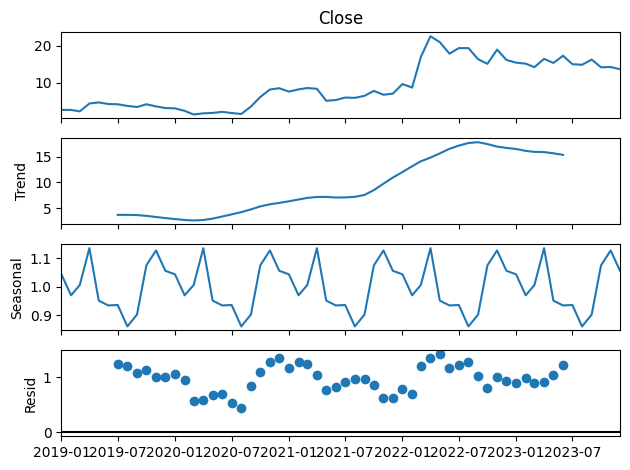

In [27]:
# Plot multiplicative decomposition
multiplicative_decomposition.plot()
plt.show()

# Time Series Forecasting Methods

In [28]:
t_len = 45
train_set = data[0:t_len] 
test_set = data[t_len:]

**Naive Method Function**

In [29]:
def naive_method(data, nforecast):
    """
    Forecast using the Naive Method.
    
    Parameters:
        data (list): A list of historical data points.
        nforecast: number of forecasts you want to make
        
    Returns:
        forecast (list): A list of forecasts for each period.
    """
    forecast = [data[-1]]  # Initial forecast is the last observed point
    number = nforecast-1 # You can adjust the number of forecast you want to make.
    
    # To forecast the next 24 points, a loop is necessary:
    for i in range(number):
         forecast.append(forecast[-i])
    
    return forecast

In [30]:
y_hat_naive = test_set.copy()
y_hat_naive['naive_forecast'] = naive_method(train_set['Close'], nforecast = 15)

In [31]:
y_hat_naive

,Close,naive_forecast
date,,
2022-10-01,15.150000,16.4
2022-11-01,19.000000,16.4
2022-12-01,16.200001,16.4
2023-01-01,15.475000,16.4
2023-02-01,15.200000,16.4
2023-03-01,14.250000,16.4
2023-04-01,16.500000,16.4
2023-05-01,15.400000,16.4
2023-06-01,17.340000,16.4


**Graph for train dataset and Test dataset**

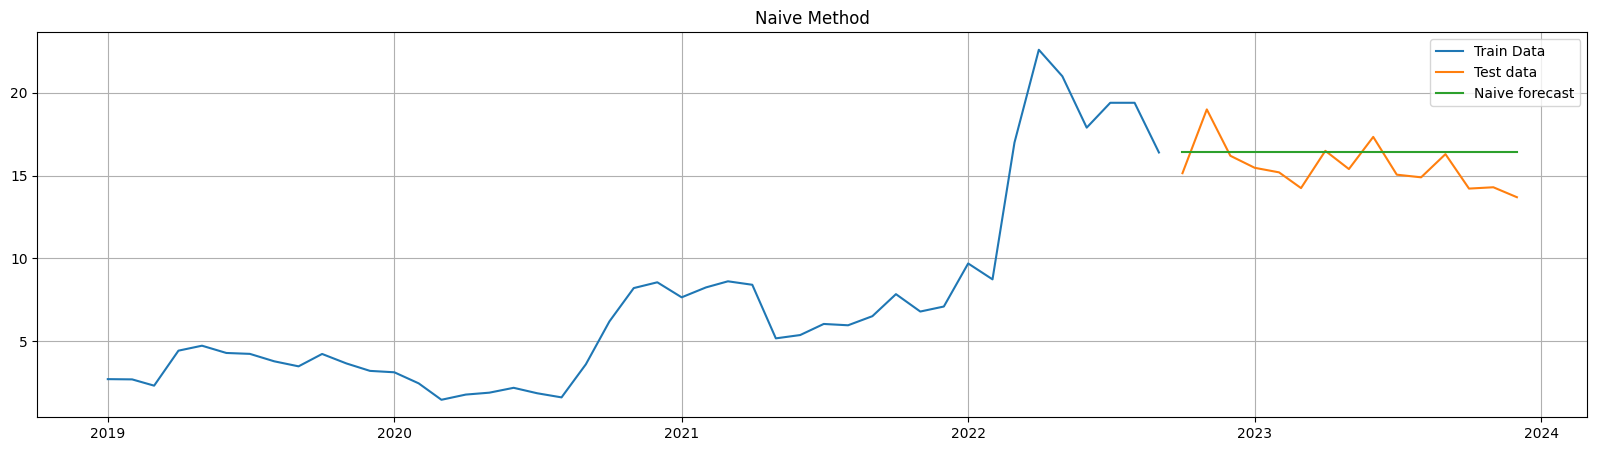

In [32]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_set['Close'], label='Train Data')
plt.plot(test_set['Close'], label='Test data')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Accurcary metrics

In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_set['Close'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_set['Close']-y_hat_naive['naive_forecast'])/test_set['Close'])*100,2)
mae  = np.round(np.mean(np.abs(test_set['Close']-y_hat_naive['naive_forecast'])),2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Naive method,1.58,1.35,8.93
